In [1]:
import ast 
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


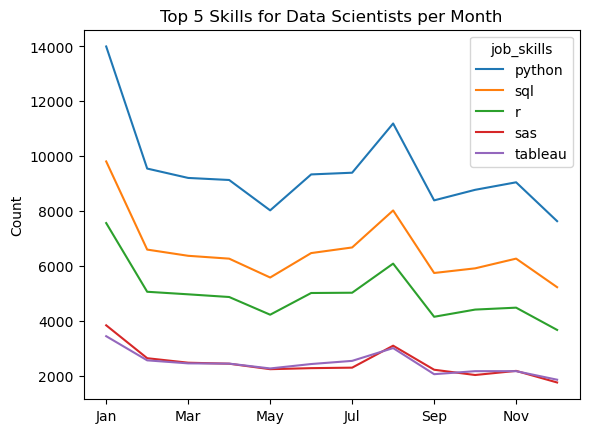

In [3]:
df_DS = df[df['job_title_short']== 'Data Scientist'].copy()
df_DS['job_posted_month'] = df_DS['job_posted_date'].dt.month

df_DS_explode = df_DS.explode('job_skills')
df_DS_pivot = df_DS_explode.pivot_table(index='job_posted_month', columns='job_skills', aggfunc='size', fill_value=0)

df_DS_pivot.loc['Total'] = df_DS_pivot.sum()
df_DS_pivot = df_DS_pivot[df_DS_pivot.loc['Total'].sort_values(ascending=False).index]
df_DS_pivot = df_DS_pivot.drop('Total')

df_DS_pivot = df_DS_pivot.reset_index()
df_DS_pivot['job_posted_month'] = df_DS_pivot['job_posted_month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DS_pivot = df_DS_pivot.set_index('job_posted_month')
# df_DS_pivot = df_DS_pivot.drop('')


df_DS_pivot.iloc[:, :5].plot(kind='line')
plt.title('Top 5 Skills for Data Scientists per Month')
plt.ylabel('Count')
plt.xlabel('')

plt.show()

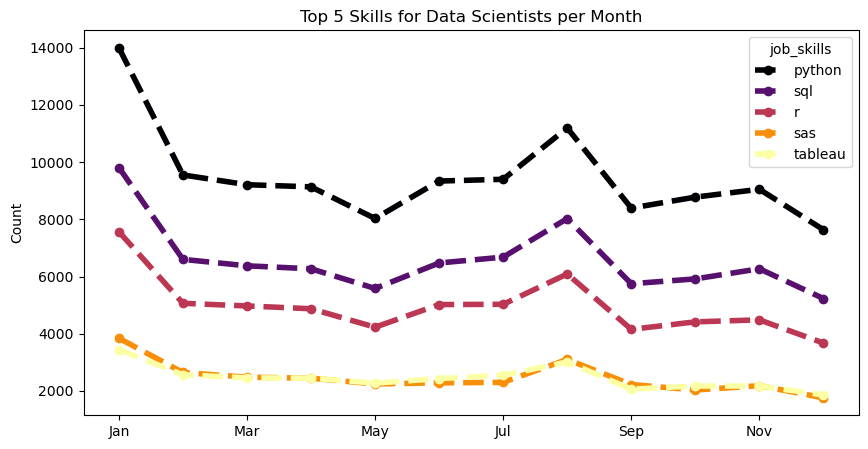

In [17]:
df_DS_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle='--', 
    colormap='inferno',
    marker='o', 
    markersize=6, 
    figsize=(10,5)

)
plt.title('Top 5 Skills for Data Scientists per Month')
plt.ylabel('Count')
plt.xlabel('')

plt.show()

In [20]:
df_exploded = df_DS.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)

skill_count = 15
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)

skill_stats

,median_salary,skill_count
job_skills,,
python,130500.0,113711
sql,132500.0,78982
r,125000.0,59566
sas,119000.0,29534
tableau,125000.0,29445
aws,132500.0,26256
spark,135000.0,24286
azure,127500.0,21664
tensorflow,140000.0,19153


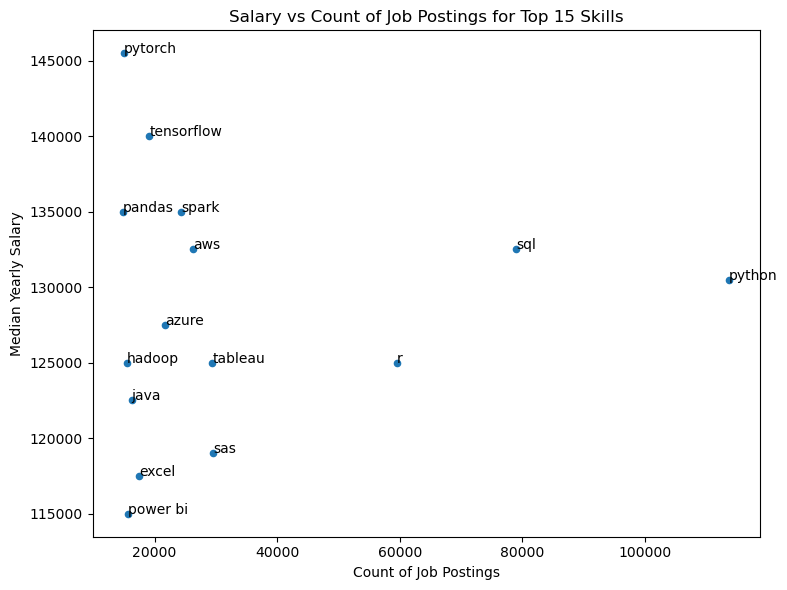

In [23]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary', figsize=(8,6))

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i],txt)

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

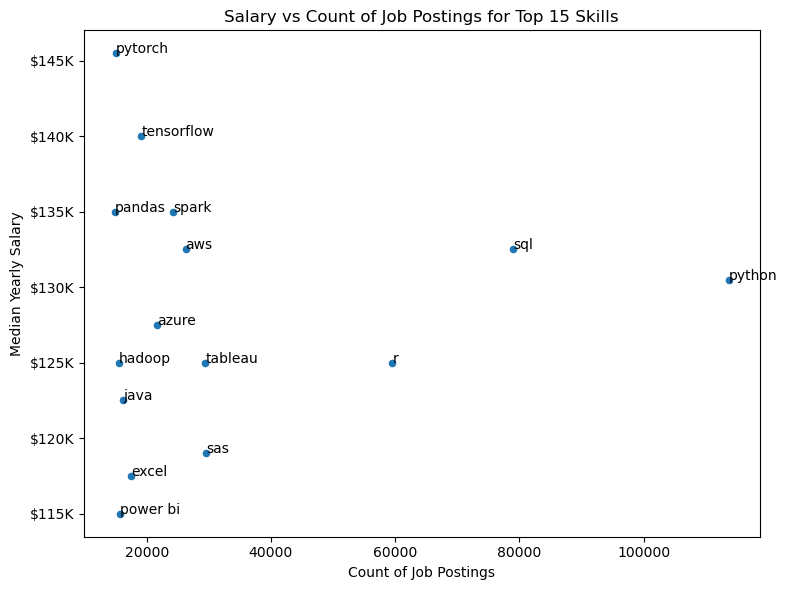

In [30]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary', figsize=(8,6))

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i],txt)

ax = plt.gca()

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()